In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['axes.labelsize'] = 14
plt.style.use('dark_background')

In [2]:
# import the csv file 
df = pd.read_csv('kc_house_data.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Cleaning

In [3]:
# list data types
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
# find the number of rows and columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   Unnamed: 0.1   21613 non-null  int64  
 2   id             21613 non-null  int64  
 3   date           21613 non-null  object 
 4   price          21613 non-null  float64
 5   bedrooms       21600 non-null  float64
 6   bathrooms      21603 non-null  float64
 7   sqft_living    21613 non-null  int64  
 8   sqft_lot       21613 non-null  int64  
 9   floors         21613 non-null  float64
 10  waterfront     21613 non-null  int64  
 11  view           21613 non-null  int64  
 12  condition      21613 non-null  int64  
 13  grade          21613 non-null  int64  
 14  sqft_above     21613 non-null  int64  
 15  sqft_basement  21613 non-null  int64  
 16  yr_built       21613 non-null  int64  
 17  yr_renovated   21613 non-null  int64  
 18  zipcod

In [5]:
# Find columns that contain null data
null_data = df.isnull()
null_data_columns = null_data.columns[(null_data == True).any()]
for column in null_data_columns:
    print(f'{column} null value: {null_data[column].sum()} ')

bedrooms null value: 13 
bathrooms null value: 10 


In [6]:
# print out the dataset where it contains missing bedroom values
null_bed = df[df['bedrooms'].isnull()]
null_bed

,Unnamed: 0,Unnamed: 0.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,875,875,6306400140,20140612T000000,1095000.0,NaN,NaN,3064,4764,3.5,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3119,3119,3918400017,20150205T000000,380000.0,NaN,NaN,1470,979,3.0,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,3467,3467,1453602309,20140805T000000,288000.0,NaN,1.50,1430,1650,3.0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,4868,4868,6896300380,20141002T000000,228000.0,NaN,1.00,390,5900,1.0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,6994,6994,2954400190,20140624T000000,1295650.0,NaN,NaN,4810,28008,2.0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,8477,8477,2569500210,20141117T000000,339950.0,NaN,2.50,2290,8319,2.0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,8484,8484,2310060040,20140925T000000,240000.0,NaN,2.50,1810,5669,2.0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,9773,9773,3374500520,20150429T000000,355000.0,NaN,NaN,2460,8049,2.0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,9854,9854,7849202190,20141223T000000,235000.0,NaN,NaN,1470,4800,2.0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,12653,12653,7849202299,20150218T000000,320000.0,NaN,2.50,1490,7111,2.0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [7]:
# print out the dataset where it contains missing bathroom values
null_bath = df[df['bathrooms'].isnull()]
null_bath

,Unnamed: 0,Unnamed: 0.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,875,875,6306400140,20140612T000000,1095000.0,NaN,NaN,3064,4764,3.5,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,1149,1149,3421079032,20150217T000000,75000.0,1.0,NaN,670,43377,1.0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3119,3119,3918400017,20150205T000000,380000.0,NaN,NaN,1470,979,3.0,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5832,5832,5702500050,20141104T000000,280000.0,1.0,NaN,600,24501,1.0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,6994,6994,2954400190,20140624T000000,1295650.0,NaN,NaN,4810,28008,2.0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,9773,9773,3374500520,20150429T000000,355000.0,NaN,NaN,2460,8049,2.0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,9854,9854,7849202190,20141223T000000,235000.0,NaN,NaN,1470,4800,2.0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,10481,10481,203100435,20140918T000000,484000.0,1.0,NaN,690,23244,1.0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,14423,14423,9543000205,20150413T000000,139950.0,NaN,NaN,844,4269,1.0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,19452,19452,3980300371,20140926T000000,142000.0,NaN,NaN,290,20875,1.0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [8]:
# As the number of bedroom and bathrooms would impact the price, it is important to have the accurate number of 
# bedrooms and bathrooms. As there are only less than 15 records with nan values, drop the rows with nan values 
# in this case
df.dropna(subset=['bedrooms', 'bathrooms'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   Unnamed: 0.1   21597 non-null  int64  
 2   id             21597 non-null  int64  
 3   date           21597 non-null  object 
 4   price          21597 non-null  float64
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  int64  
 8   sqft_lot       21597 non-null  int64  
 9   floors         21597 non-null  float64
 10  waterfront     21597 non-null  int64  
 11  view           21597 non-null  int64  
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  int64  
 15  sqft_basement  21597 non-null  int64  
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   21597 non-null  int64  
 18  zipcod

In [9]:
# drop unwanted columns
df.drop(labels=['Unnamed: 0', 'Unnamed: 0.1', 'id'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  float64
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [11]:
df.describe().T.style.bar(subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
price,21597.000000,540202.919757,367133.730890,78000.000000,322000.000000,450000.000000,645000.000000,7700000.000000
bedrooms,21597.000000,3.373200,0.926299,1.000000,3.000000,3.000000,4.000000,33.000000
bathrooms,21597.000000,2.115826,0.768984,0.500000,1.750000,2.250000,2.500000,8.000000
sqft_living,21597.000000,2080.321850,918.106125,370.000000,1430.000000,1910.000000,2550.000000,13540.000000
sqft_lot,21597.000000,15099.408760,41412.636876,520.000000,5040.000000,7618.000000,10685.000000,1651359.000000
floors,21597.000000,1.494096,0.539683,1.000000,1.000000,1.500000,2.000000,3.500000
waterfront,21597.000000,0.007547,0.086549,0.000000,0.000000,0.000000,0.000000,1.000000
view,21597.000000,0.234292,0.766390,0.000000,0.000000,0.000000,0.000000,4.000000
condition,21597.000000,3.409825,0.650546,1.000000,3.000000,3.000000,4.000000,5.000000
grade,21597.000000,7.657915,1.173200,3.000000,7.000000,7.000000,8.000000,13.000000


(-100.0, 7700000.0)

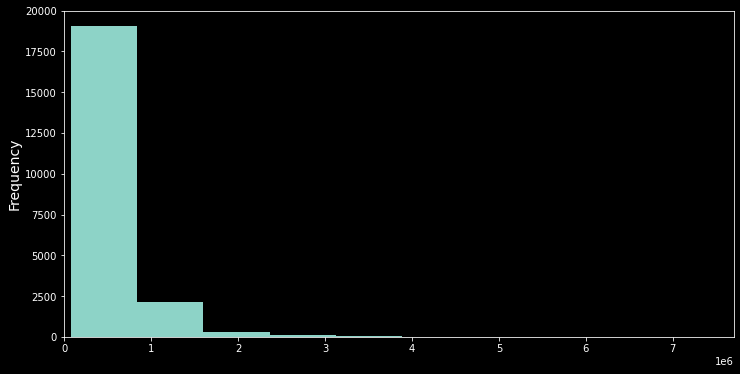

In [12]:
# plot the distribution plot of the price range
df['price'].plot(kind='hist')
plt.xlim((-100,df['price'].max()))

Text(0.5, 0, 'Price')

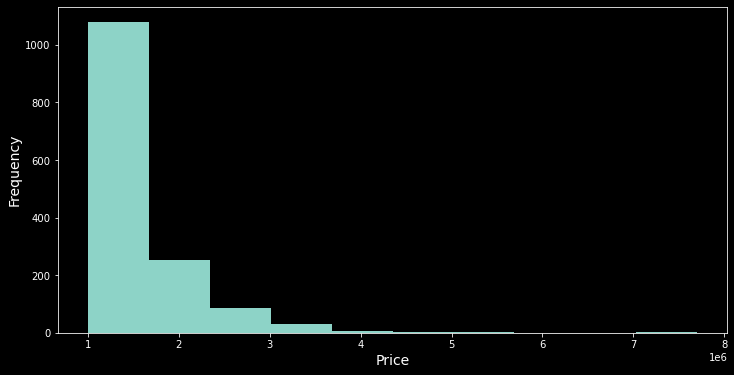

In [13]:
# plot the histogram of price for more than 1,000,000 
df[df['price'] > 1_000_000]['price'].plot(kind='hist')
plt.xlabel('Price')

In [14]:
# find out the characteristic of price for more than 2,500,000
top_price = df[df['price'] > 2_500_000]
print(f'the number of the properties: {len(top_price)}')
top_price.describe()

the number of the properties: 97


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.700000e+01,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,3.294238e+06,4.494845,4.121134,5598.000000,22464.917526,1.902062,0.340206,2.288660,3.505155,11.072165,4400.927835,1197.072165,1975.804124,309.020619,98059.876289,47.622259,-122.237722,3634.567010,18700.432990
std,9.555553e+05,0.969576,1.124487,1616.071781,16317.248719,0.492861,0.476240,1.713663,0.723471,1.043306,1385.183158,949.200456,34.086788,726.281568,55.225911,0.048732,0.077840,754.502221,13933.166225
min,2.510000e+06,2.000000,1.750000,3280.000000,3800.000000,1.000000,0.000000,0.000000,2.000000,8.000000,2090.000000,0.000000,1904.000000,0.000000,98004.000000,47.455800,-122.410000,1770.000000,3800.000000
25%,2.720000e+06,4.000000,3.250000,4475.000000,12445.000000,2.000000,0.000000,0.000000,3.000000,10.000000,3430.000000,330.000000,1950.000000,0.000000,98008.000000,47.594300,-122.280000,3130.000000,10408.000000
50%,3.000000e+06,4.000000,4.000000,5190.000000,18115.000000,2.000000,0.000000,3.000000,3.000000,11.000000,4280.000000,1240.000000,1991.000000,0.000000,98039.000000,47.626300,-122.230000,3670.000000,16572.000000
75%,3.400000e+06,5.000000,4.750000,6410.000000,26211.000000,2.000000,1.000000,4.000000,4.000000,12.000000,5050.000000,1760.000000,2004.000000,0.000000,98109.000000,47.640900,-122.213000,4050.000000,21750.000000
max,7.700000e+06,8.000000,8.000000,12050.000000,91681.000000,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2014.000000,2010.000000,98199.000000,47.749300,-121.982000,6210.000000,95832.000000


Text(0.5, 0, 'Price')

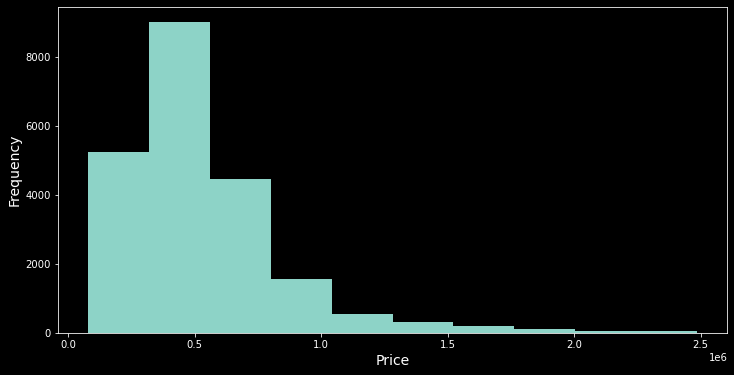

In [15]:
# based on the analysis, price more than 2,500,000 would be outliers in this dataset. Only 97 properties are within 
# this price range, less than 0.5%. Their characteristic is very different from the rest of dataset. 
# remove this price range from the dataset
df = df[df['price'] < 2_500_000]
df['price'].plot(kind='hist')
plt.xlabel('Price')

## Explanatory Data Analysis

Text(0, 0.5, 'Count')

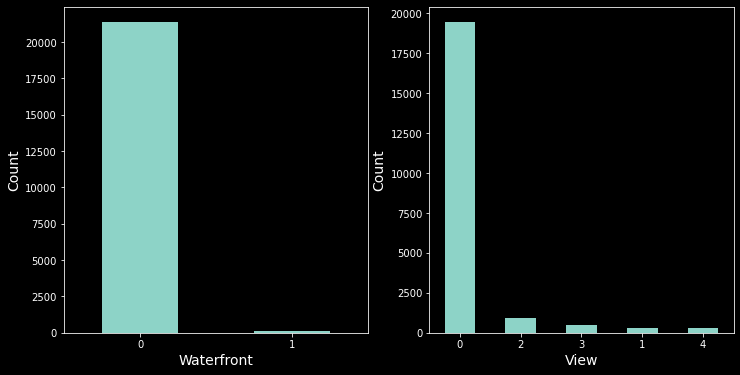

In [16]:
# find the count of properties w/o waterfront and good views
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
df['waterfront'].value_counts().plot(kind='bar', ax=ax1)
df['view'].value_counts().plot(kind='bar', ax=ax2)
ax1.tick_params(axis='x', labelrotation=0)
ax2.tick_params(axis='x', labelrotation=0)
ax1.set_xlabel('Waterfront')
ax2.set_xlabel('View')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

<AxesSubplot:xlabel='view', ylabel='price'>

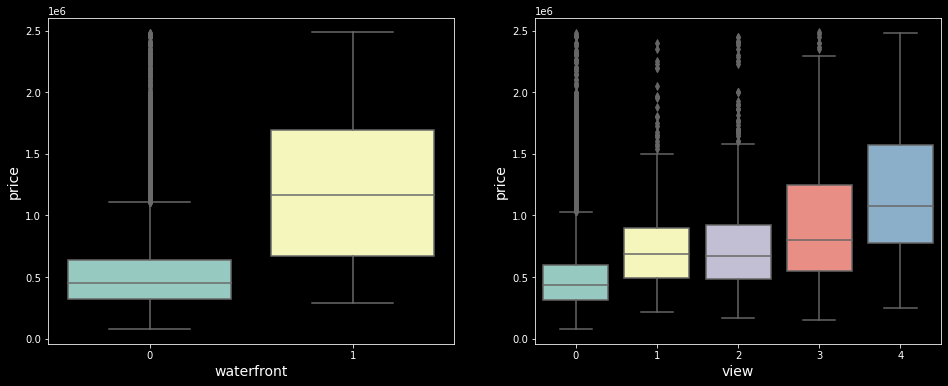

In [17]:
# make box plot to see how waterfront and view would affect the price of the property
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.boxplot(x='waterfront', y='price', data=df, ax=ax1)
sns.boxplot(x='view', y='price', data=df, ax=ax2)

Text(0, 0.5, 'Count')

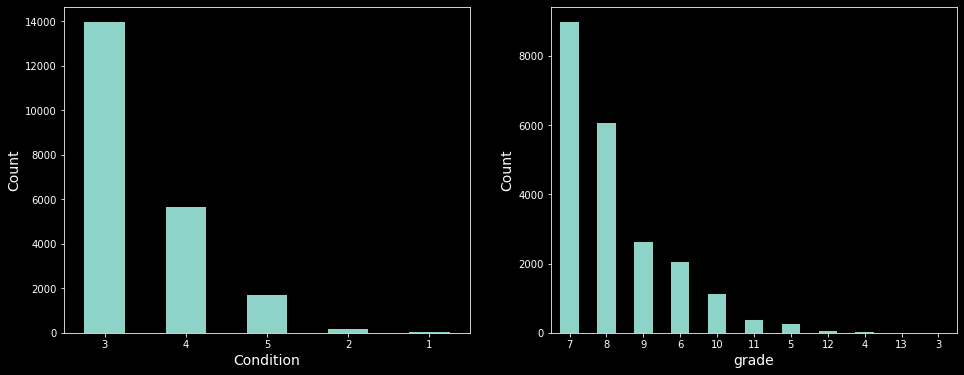

In [18]:
# find the count of properties in different condition and grade
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
df['condition'].value_counts().plot(kind='bar', ax=ax1)
df['grade'].value_counts().plot(kind='bar', ax=ax2)
ax1.tick_params(axis='x', labelrotation=0)
ax2.tick_params(axis='x', labelrotation=0)
ax1.set_xlabel('Condition')
ax2.set_xlabel('grade')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

<AxesSubplot:xlabel='grade', ylabel='price'>

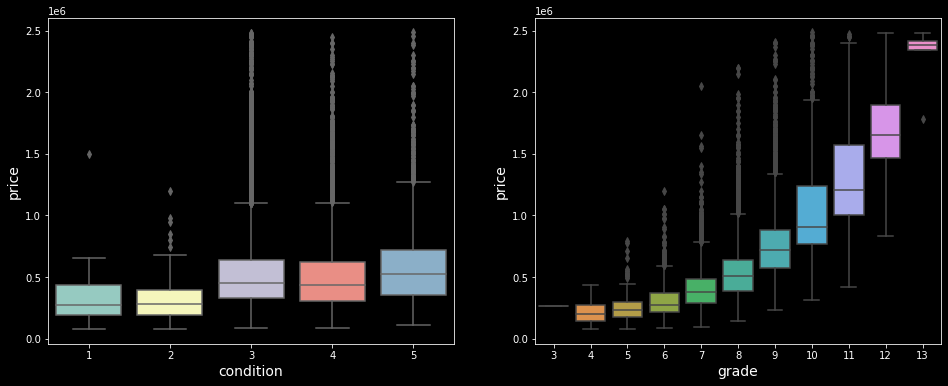

In [19]:
# make box plot to see how waterfront and view would affect the price of the property
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.boxplot(x='condition', y='price', data=df, ax=ax1)
sns.boxplot(x='grade', y='price', data=df, ax=ax2)

Text(0, 0.5, 'Count')

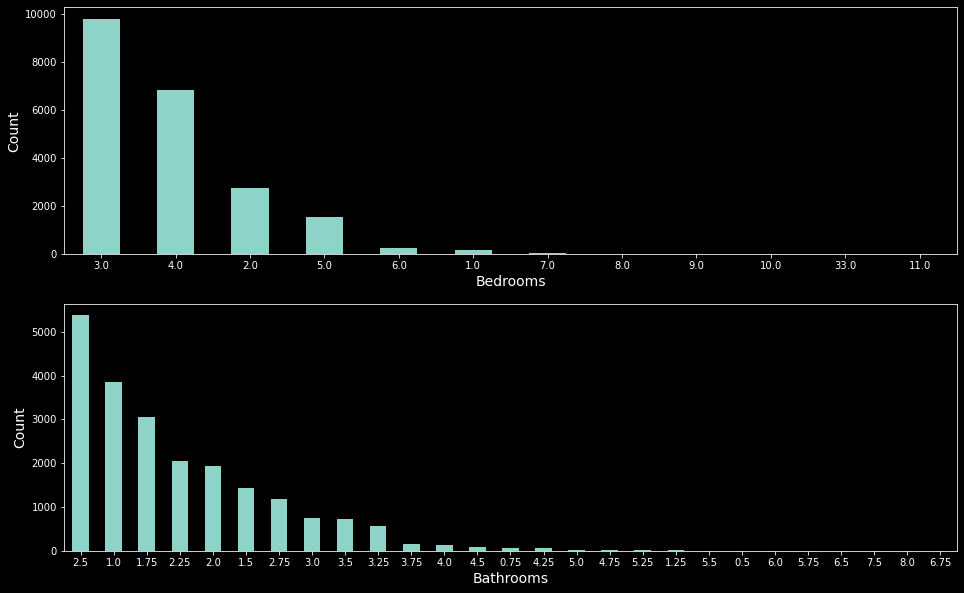

In [20]:
# find the count of number of bedrooms and bathrooms
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
df['bedrooms'].round(1).value_counts().plot(kind='bar', ax=ax1)
df['bathrooms'].round(2).value_counts().plot(kind='bar', ax=ax2)
ax1.tick_params(axis='x', labelrotation=0)
ax2.tick_params(axis='x', labelrotation=0)
ax1.set_xlabel('Bedrooms')
ax2.set_xlabel('Bathrooms')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

In [21]:
# based on the histogram, remove bedrooms with more than 6 rooms and bathrooms with more than 6 rooms as the 
# range is outliers
df = df[df['bedrooms'] <= 7]
df = df[df['bathrooms'] <= 6]
df.reset_index(drop=True, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21468 entries, 0 to 21467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21468 non-null  object 
 1   price          21468 non-null  float64
 2   bedrooms       21468 non-null  float64
 3   bathrooms      21468 non-null  float64
 4   sqft_living    21468 non-null  int64  
 5   sqft_lot       21468 non-null  int64  
 6   floors         21468 non-null  float64
 7   waterfront     21468 non-null  int64  
 8   view           21468 non-null  int64  
 9   condition      21468 non-null  int64  
 10  grade          21468 non-null  int64  
 11  sqft_above     21468 non-null  int64  
 12  sqft_basement  21468 non-null  int64  
 13  yr_built       21468 non-null  int64  
 14  yr_renovated   21468 non-null  int64  
 15  zipcode        21468 non-null  int64  
 16  lat            21468 non-null  float64
 17  long           21468 non-null  float64
 18  sqft_l

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

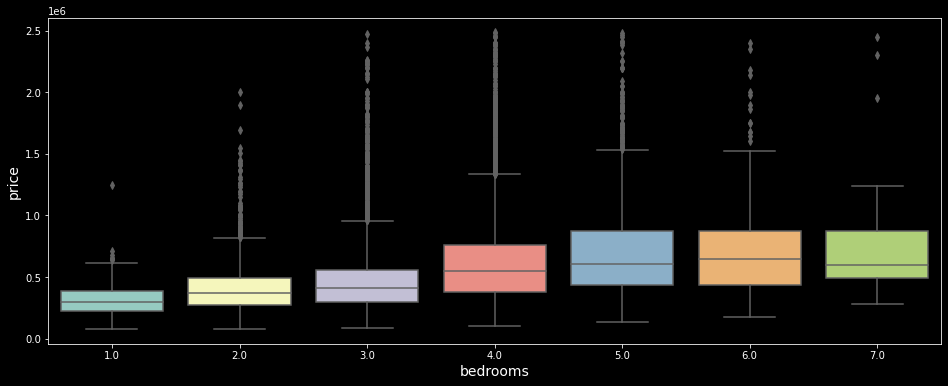

In [23]:
# make box plot for the number of bedrooms vs price
plt.figure(figsize=(16, 6))
sns.boxplot(x='bedrooms', y='price', data=df.round({'bedrooms':2}))

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

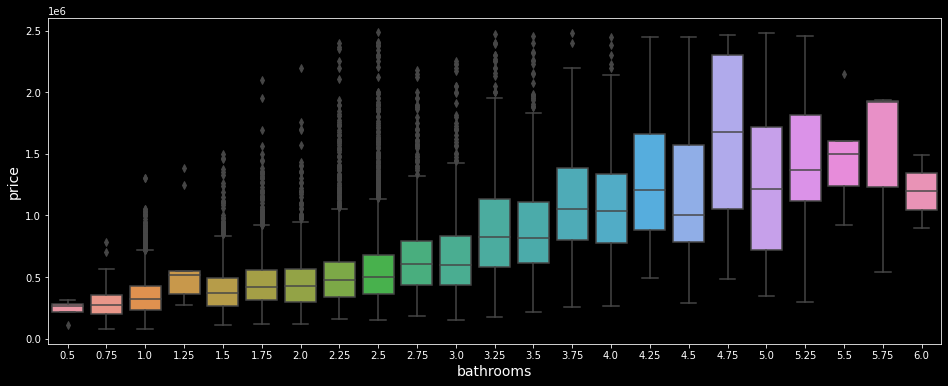

In [24]:
# make box plot for the number of bathrooms vs price
plt.figure(figsize=(16, 6))
sns.boxplot(x='bathrooms', y='price', data=df.round({'bathrooms':2}))

Text(0.5, 0, 'Floors')

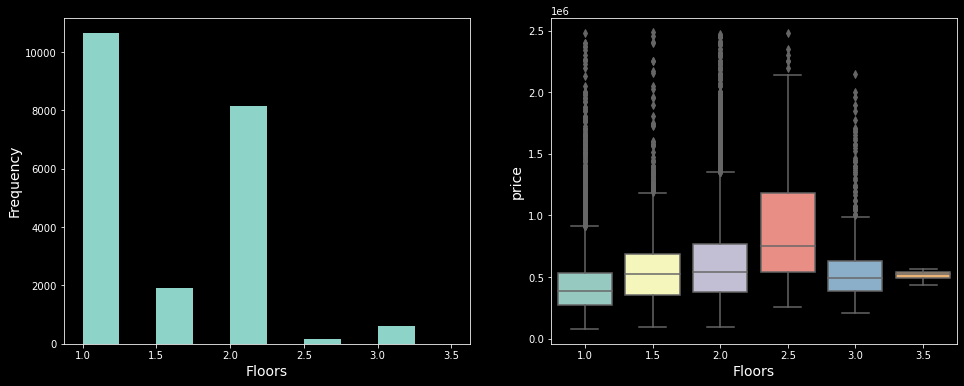

In [25]:
# plot the count of the number of floors and make box plot for the number of bathrooms vs price
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
df['floors'].plot(kind='hist', ax=ax1)
sns.boxplot(x='floors', y='price', data=df, ax=ax2)
ax1.set_xlabel('Floors')
ax2.set_xlabel('Floors')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(98000.80099999999, 98020.8]'),
  Text(1, 0, '(98020.8, 98040.6]'),
  Text(2, 0, '(98040.6, 98060.4]'),
  Text(3, 0, '(98060.4, 98080.2]'),
  Text(4, 0, '(98080.2, 98100.0]'),
  Text(5, 0, '(98100.0, 98119.8]'),
  Text(6, 0, '(98119.8, 98139.6]'),
  Text(7, 0, '(98139.6, 98159.4]'),
  Text(8, 0, '(98159.4, 98179.2]'),
  Text(9, 0, '(98179.2, 98199.0]')])

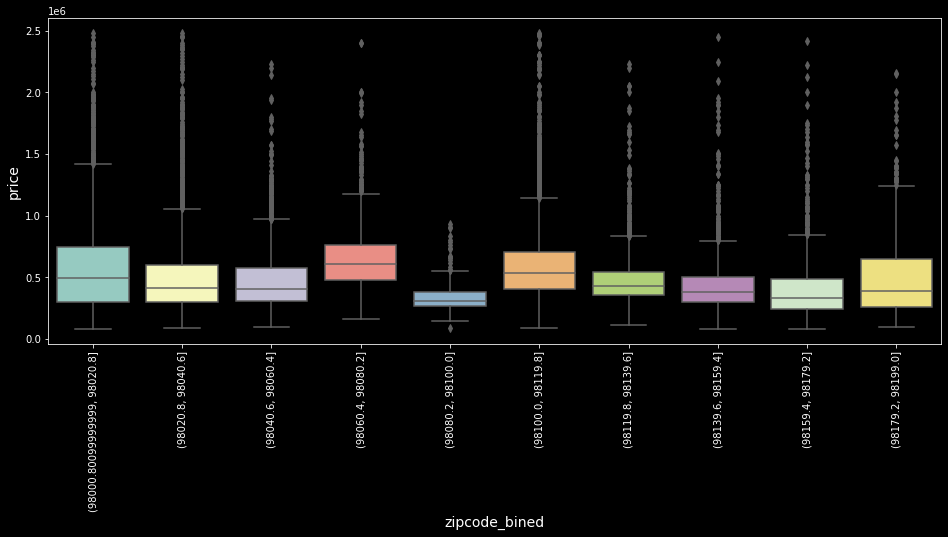

In [26]:
# divide zipcode into 20 bins and plot box plots to see if a specific area has higher price range
df['zipcode_bined'] = pd.cut(df['zipcode'], bins=10, include_lowest=True)
plt.figure(figsize=(16,6))
sns.boxplot(x='zipcode_bined', y='price', data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

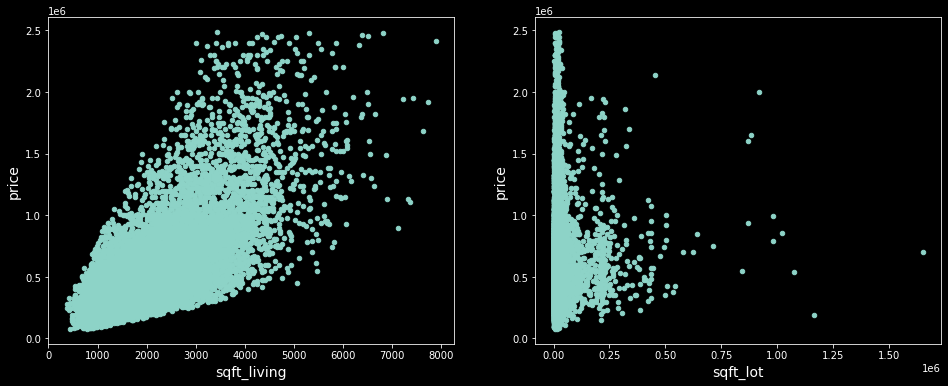

In [27]:
# plot the scatter plot of sqft_living and sqft_lot vs price
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
df.plot(x='sqft_living', y='price', kind='scatter', ax=ax1)
df.plot(x='sqft_lot', y='price', kind='scatter', ax=ax2)

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

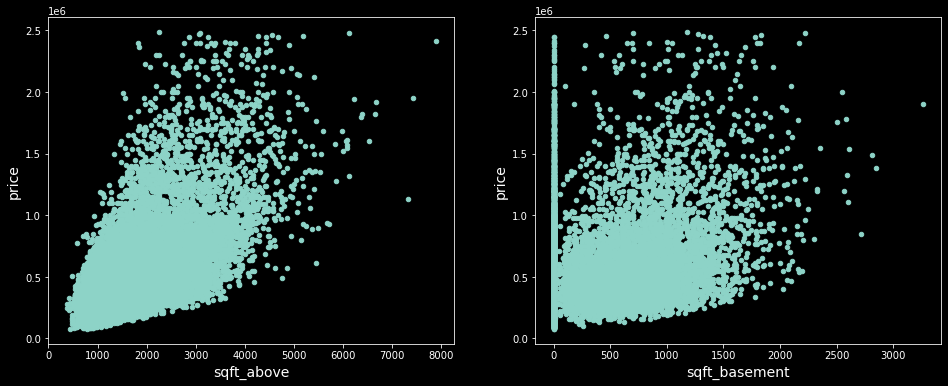

In [28]:
# plot the scatter plot of sqft_above and sqft_basement vs price
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
df.plot(x='sqft_above', y='price', kind='scatter', ax=ax1)
df.plot(x='sqft_basement', y='price', kind='scatter', ax=ax2)

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

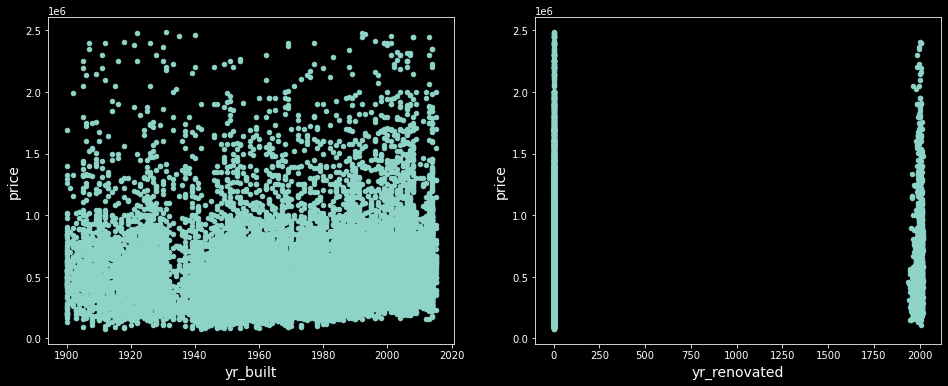

In [29]:
# plot the scatter plot of yr_built and yr_renovated vs price
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
df.plot(x='yr_built', y='price', kind='scatter', ax=ax1)
df.plot(x='yr_renovated', y='price', kind='scatter', ax=ax2)

<AxesSubplot:xlabel='long', ylabel='price'>

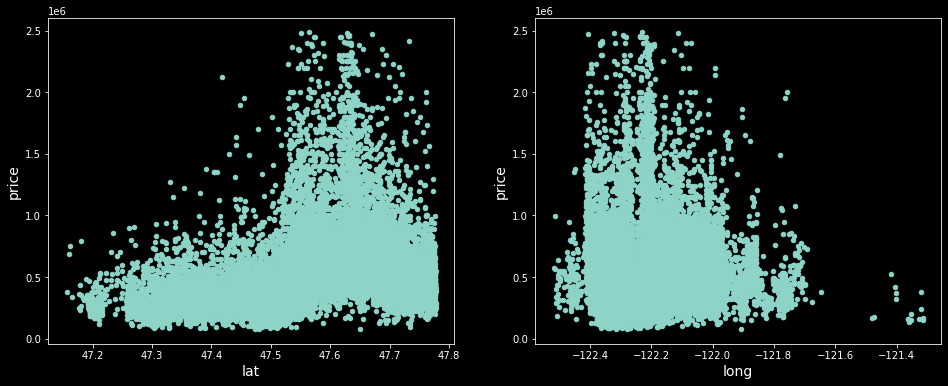

In [30]:
# plot the scatter plot of lat and long vs price
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
df.plot(x='lat', y='price', kind='scatter', ax=ax1)
df.plot(x='long', y='price', kind='scatter', ax=ax2)

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

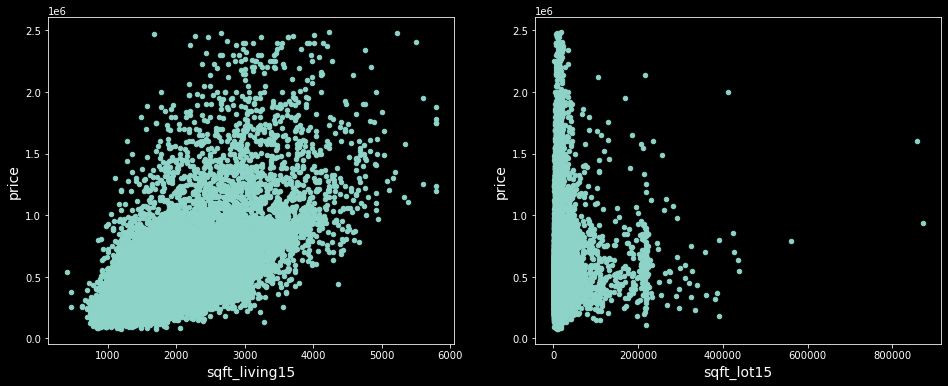

In [31]:
# plot the scatter plot of sqft_living and sqft_lot vs price
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
df.plot(x='sqft_living15', y='price', kind='scatter', ax=ax1)
df.plot(x='sqft_lot15', y='price', kind='scatter', ax=ax2)

<AxesSubplot:>

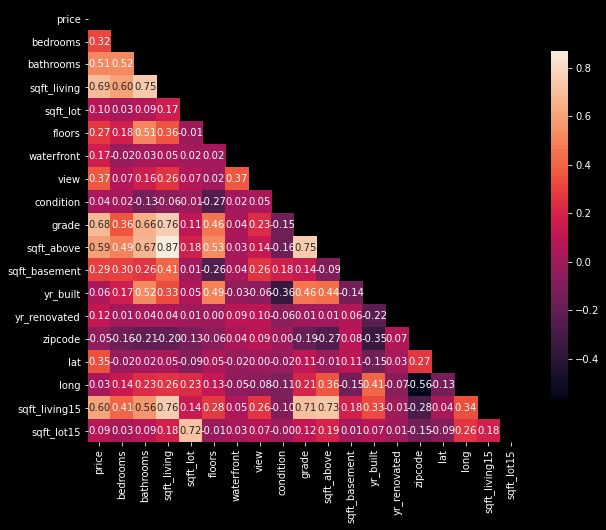

In [32]:
# explanatory data analysis
# plot the heat map and find the coefficient coefficient 
corr_df = df.corr()
mask = np.triu(corr_df)
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_df, annot=True, square=True, mask=mask, fmt='.2f', cbar_kws={"shrink": 0.8})

In [33]:
# display the correlation coefficient for 'price'
corr_df['price'].sort_values()

zipcode         -0.047257
long             0.032875
condition        0.039195
yr_built         0.058086
sqft_lot15       0.086943
sqft_lot         0.096753
yr_renovated     0.122310
waterfront       0.174250
floors           0.273747
sqft_basement    0.293122
bedrooms         0.320617
lat              0.346064
view             0.368453
bathrooms        0.513644
sqft_above       0.590965
sqft_living15    0.601652
grade            0.681736
sqft_living      0.686157
price            1.000000
Name: price, dtype: float64

**Conclusions**: Based on the explanatory data analysis, categorical and discrete variables that do show strong correlation with the price are: condition, waterfront, bedrooms, bathrooms, view, grade, floors. Continuous variables that show strong correlation are:sqft_living, sqft_living15,sqft_above.    

## Model Building and Evaluation

In [34]:
# split data into train and test data set
from sklearn.model_selection import train_test_split
y_data = df[['price']]
x_data = df.drop(['price', 'zipcode_bined','date'], axis=1)
(x_train, x_test, y_train, y_test) = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [35]:
# use linear regression to fit the data and get R^2 score on test data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_lm = lm.predict(x_test)
R2_lm = lm.score(x_test, y_test)
print(f'Linear Regression R^2: {R2_lm}')

Linear Regression R^2: 0.720759900440291


In [36]:
# build a pipeline to normalize the data, use polynomial regression (degree=2) to fit the data and 
# get R^2 score on test data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
Input =[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
       ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x_train, y_train)
yhat_poly = pipe.predict(x_test)
R2_poly = pipe.score(x_test, y_test)
print(f'2nd Degree Polynomial R^2: {R2_poly}')

2nd Degree Polynomial R^2: 0.8054165837388928


In [37]:
# plot distirbution plot for y_test, linear model and polynomial model
test = y_test.squeeze().rename('Actual Value')
yhat_lm = pd.Series(yhat_lm.reshape(len(yhat_lm)), name=f'Linear model R^2: {R2_lm:.3f}')
yhat_poly = pd.Series(yhat_poly.reshape(len(yhat_poly)), name=f'2nd degree Polynomial R^2: {R2_poly:.3f}')
plot_df = pd.concat([test, yhat_lm, yhat_poly], axis=1)

Text(0.5, 1.0, 'Actual Value vs Linear vs 2nd degree Polynomial')

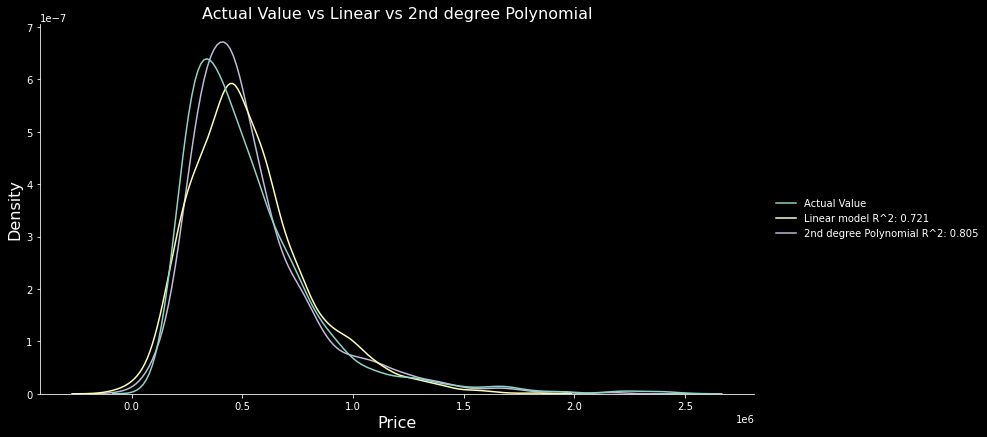

In [38]:
font = {'size' : 16}
sns.displot(data=plot_df, height =6, aspect=1.8, kind='kde')
plt.rc('lines', linewidth=3)
plt.xlabel('Price', **font)
plt.ylabel('Density', **font)
plt.title('Actual Value vs Linear vs 2nd degree Polynomial', **font)

In [39]:
# Builde ridge regression model to fit data 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
pr = PolynomialFeatures(degree=2)
# split data into test and train and fit_transform train and test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=None)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)

In [ ]:
# loop through different alpha value to find the one that minimizes the error
from tqdm import tqdm

R2_ridge_test = []
R2_ridge_train = []
Alpha = 10 * np.arange(100)
pbar = tqdm(Alpha)

for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha) 
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    R2_ridge_test.append(test_score)
    R2_ridge_train.append(train_score)

 16%|█▌        | 16/100 [00:03<00:19,  4.20it/s, Test Score=0.773, Train Score=0.784]/Users/theresama/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.00108e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
 29%|██▉       | 29/100 [00:07<00:25,  2.78it/s, Test Score=0.772, Train Score=0.783]/Users/theresama/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.17612e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
 39%|███▉      | 39/100 [00:09<00:14,  4.16it/s, Test Score=0.772, Train Score=0.782]

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(Alpha, R2_ridge_train, 'b-', Alpha, R2_ridge_test, 'r-')
plt.rcParams['lines.linewidth'] = 2
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['training data', 'validation data'])

based on the model evaluation, 2nd degree polynomial with normalization produces best estimate. R^2: 0.805

In [ ]:
# randomly pick a house from the dataset and predict the price
house_id = np.random.randint(0, len(df))
x_house = df.iloc[house_id, :].to_frame()
x_house.drop(['price', 'zipcode_bined','date'], inplace=True)
y_house = pipe.predict(x_house.T)

print(f"the actual price is ${df.loc[house_id, 'price']} and the prediction is ${y_house[0][0]}")